In [2]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *
import pydicom
import pandas as pd
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage
from skimage import morphology
from skimage.transform import resize
import cv2
import pickle

from PIL import Image

## Left Femur

In [10]:
left_hips = get_dicom_files("/scratch1/08068/ekun/unzipped_DXA_Images/Left_Femur")

files = []
all_rows = []
all_cols = []
all_pixel_lengths = []

i = 0
while i < len(left_hips): 
    xray_sample = left_hips[i].dcmread()
#     print(str(spine_xrays[i])[50:])
#     print(xray_sample)
#     xray_sample.show()
#     print()
#     print("Pixel shape and array:")
#     print(xray_sample.pixel_array.shape)
#     print(xray_sample.pixel_array)
    rows = xray_sample[0x00280010].value
    cols = xray_sample[0x00280011].value
#     print(rows)
#     print(cols)
#     print()
    pixels = rows*cols
    files.append(str(left_hips[i])[52:])
    all_rows.append(rows)
    all_cols.append(cols)
    all_pixel_lengths.append(pixels)
    i += 1

In [11]:
df = pd.DataFrame()
df["File"] = files
df["Rows"] = all_rows
df["Columns"] = all_cols
df["Pixel Lengths"] = all_pixel_lengths
df

,File,Rows,Columns,Pixel Lengths
0,1.2.840.113619.2.110.210419.20160928120246.1.5.12.1.dcm,626,716,448216
1,1.2.840.113619.2.110.212174.20190116103804.1.5.12.1.dcm,664,600,398400
2,1.2.840.113619.2.110.210419.20151018090216.2.5.12.1.dcm,766,716,548456
3,1.2.840.113619.2.110.210419.20190315111926.1.5.12.1.dcm,663,680,450840
4,1.2.840.113619.2.110.210419.20150913115837.2.5.12.1.dcm,762,716,545592
...,...,...,...,...
42171,1.2.840.113619.2.110.212174.20190824114508.1.5.12.1.dcm,599,600,359400
42172,1.2.840.113619.2.110.210419.20160923115706.1.5.12.1.dcm,561,716,401676
42173,1.2.840.113619.2.110.210419.20190505172026.1.5.12.1.dcm,729,680,495720
42174,1.2.840.113619.2.110.210419.20190308104641.1.5.12.1.dcm,599,680,407320


In [12]:
df.to_csv("/work2/08068/ekun/frontera/output_files/Left_Femur_image_size.csv", sep='\t', index = False)

In [3]:
df = pd.read_csv("/work2/08068/ekun/frontera/output_files/Left_Femur_image_size.csv", delimiter = "\t")
df

,File,Rows,Columns,Pixel Lengths
0,1.2.840.113619.2.110.210419.20160928120246.1.5.12.1.dcm,626,716,448216
1,1.2.840.113619.2.110.212174.20190116103804.1.5.12.1.dcm,664,600,398400
2,1.2.840.113619.2.110.210419.20151018090216.2.5.12.1.dcm,766,716,548456
3,1.2.840.113619.2.110.210419.20190315111926.1.5.12.1.dcm,663,680,450840
4,1.2.840.113619.2.110.210419.20150913115837.2.5.12.1.dcm,762,716,545592
...,...,...,...,...
42171,1.2.840.113619.2.110.212174.20190824114508.1.5.12.1.dcm,599,600,359400
42172,1.2.840.113619.2.110.210419.20160923115706.1.5.12.1.dcm,561,716,401676
42173,1.2.840.113619.2.110.210419.20190505172026.1.5.12.1.dcm,729,680,495720
42174,1.2.840.113619.2.110.210419.20190308104641.1.5.12.1.dcm,599,680,407320


In [4]:
patients = pd.read_csv('/work2/08068/ekun/frontera/output_files/DXA_Images_by_bodypart/DXA_Left_Femur.csv', delimiter = "\t")
patients

,Patient EID,Left Femur
0,1000276,/scratch1/08068/ekun/unzipped_DXA_Images/1000276_20158_2_0_unzip/1.2.840.113619.2.110.210419.20160630134645.1.5.12.1.dcm
1,1000308,/scratch1/08068/ekun/unzipped_DXA_Images/1000308_20158_2_0_unzip/1.2.840.113619.2.110.212038.20190713145949.1.5.12.1.dcm
2,1000320,/scratch1/08068/ekun/unzipped_DXA_Images/1000320_20158_2_0_unzip/1.2.840.113619.2.110.210419.20180924120838.1.5.12.1.dcm
3,1000592,/scratch1/08068/ekun/unzipped_DXA_Images/1000592_20158_2_0_unzip/1.2.840.113619.2.110.210419.20180521101443.1.5.12.1.dcm
4,1000742,/scratch1/08068/ekun/unzipped_DXA_Images/1000742_20158_2_0_unzip/1.2.840.113619.2.110.210419.20170305174203.1.5.12.1.dcm
...,...,...
42175,6024119,/scratch1/08068/ekun/unzipped_DXA_Images/6024119_20158_2_0_unzip/1.2.840.113619.2.110.212038.20180618143154.1.5.12.1.dcm
42176,6024257,/scratch1/08068/ekun/unzipped_DXA_Images/6024257_20158_2_0_unzip/1.2.840.113619.2.110.210419.20190219154144.1.5.12.1.dcm
42177,6024325,/scratch1/08068/ekun/unzipped_DXA_Images/6024325_20158_2_0_unzip/1.2.840.113619.2.110.212038.20190730161133.1.5.12.1.dcm
42178,6024532,/scratch1/08068/ekun/unzipped_DXA_Images/6024532_20158_2_0_unzip/1.2.840.113619.2.110.210419.20180912183221.1.5.12.1.dcm


In [6]:
files = []
for file in patients["Left Femur"]:
    files.append(file[65:])
    
patients["File"] = files
patients = patients.drop(columns = ["Left Femur"])
patients

,Patient EID,File
0,1000276,1.2.840.113619.2.110.210419.20160630134645.1.5.12.1.dcm
1,1000308,1.2.840.113619.2.110.212038.20190713145949.1.5.12.1.dcm
2,1000320,1.2.840.113619.2.110.210419.20180924120838.1.5.12.1.dcm
3,1000592,1.2.840.113619.2.110.210419.20180521101443.1.5.12.1.dcm
4,1000742,1.2.840.113619.2.110.210419.20170305174203.1.5.12.1.dcm
...,...,...
42175,6024119,1.2.840.113619.2.110.212038.20180618143154.1.5.12.1.dcm
42176,6024257,1.2.840.113619.2.110.210419.20190219154144.1.5.12.1.dcm
42177,6024325,1.2.840.113619.2.110.212038.20190730161133.1.5.12.1.dcm
42178,6024532,1.2.840.113619.2.110.210419.20180912183221.1.5.12.1.dcm


In [7]:
mergeDf = patients.merge(df, left_on='File', right_on='File', how='right')
mergeDf

,Patient EID,File,Rows,Columns,Pixel Lengths
0,1000276,1.2.840.113619.2.110.210419.20160630134645.1.5.12.1.dcm,631,716,451796
1,1000308,1.2.840.113619.2.110.212038.20190713145949.1.5.12.1.dcm,664,680,451520
2,1000320,1.2.840.113619.2.110.210419.20180924120838.1.5.12.1.dcm,538,680,365840
3,1000592,1.2.840.113619.2.110.210419.20180521101443.1.5.12.1.dcm,794,680,539920
4,1000742,1.2.840.113619.2.110.210419.20170305174203.1.5.12.1.dcm,566,716,405256
...,...,...,...,...,...
42171,6024119,1.2.840.113619.2.110.212038.20180618143154.1.5.12.1.dcm,597,680,405960
42172,6024257,1.2.840.113619.2.110.210419.20190219154144.1.5.12.1.dcm,662,680,450160
42173,6024325,1.2.840.113619.2.110.212038.20190730161133.1.5.12.1.dcm,538,680,365840
42174,6024532,1.2.840.113619.2.110.210419.20180912183221.1.5.12.1.dcm,663,680,450840


In [8]:
mergeDf.to_csv("/work2/08068/ekun/frontera/output_files/Left_Femur_Patients_and_image_size.csv", sep='\t', index = False)

In [13]:
x=np.array(list(df["Rows"]))
print("Number of unique items: " + str(len(np.unique(x))))
print()
rows = (np.unique(x))
for item in rows:
    print(str(list(df["Rows"]).count(item)) + " image(s) have " + str(item) + " rows")
    print()

Number of unique items: 328

1 image(s) have 172 rows

2 image(s) have 192 rows

1 image(s) have 217 rows

7 image(s) have 218 rows

4 image(s) have 219 rows

2 image(s) have 220 rows

2 image(s) have 221 rows

1 image(s) have 222 rows

6 image(s) have 244 rows

5 image(s) have 245 rows

1 image(s) have 246 rows

2 image(s) have 248 rows

4 image(s) have 270 rows

2 image(s) have 271 rows

2 image(s) have 272 rows

1 image(s) have 295 rows

3 image(s) have 296 rows

1 image(s) have 297 rows

1 image(s) have 307 rows

3 image(s) have 309 rows

1 image(s) have 310 rows

1 image(s) have 364 rows

1 image(s) have 406 rows

2 image(s) have 408 rows

1 image(s) have 409 rows

1 image(s) have 410 rows

3 image(s) have 412 rows

4 image(s) have 413 rows

2 image(s) have 414 rows

3 image(s) have 415 rows

1 image(s) have 416 rows

1 image(s) have 421 rows

1 image(s) have 428 rows

2 image(s) have 430 rows

1 image(s) have 432 rows

1 image(s) have 436 rows

1 image(s) have 439 rows

1 image(s

9 image(s) have 893 rows

18 image(s) have 894 rows

18 image(s) have 895 rows

13 image(s) have 896 rows

17 image(s) have 897 rows

11 image(s) have 898 rows

7 image(s) have 900 rows

4 image(s) have 901 rows

3 image(s) have 902 rows

1 image(s) have 904 rows

1 image(s) have 906 rows

1 image(s) have 907 rows

1 image(s) have 908 rows

1 image(s) have 909 rows



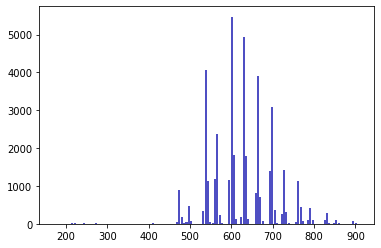

In [14]:
plt.hist(x = df["Rows"], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()

In [15]:
x=np.array(list(df["Columns"]))
print("Number of unique items: " + str(len(np.unique(x))))
print()
cols = (np.unique(x))
for item in cols:
    print(str(list(df["Columns"]).count(item)) + " image(s) have " + str(item) + " columns")
    print()

Number of unique items: 10

1 image(s) have 244 columns

4 image(s) have 268 columns

45 image(s) have 280 columns

4916 image(s) have 600 columns

8 image(s) have 640 columns

18665 image(s) have 680 columns

5 image(s) have 684 columns

18530 image(s) have 716 columns

1 image(s) have 760 columns

1 image(s) have 800 columns



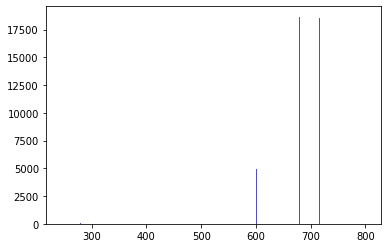

In [16]:
plt.hist(x = df["Columns"], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()

In [17]:
pd.set_option('display.max_rows', None)
df.groupby(['Rows','Columns']).size().reset_index().rename(columns={0:'count'})

,Rows,Columns,count
0,172,716,1
1,192,280,2
2,217,280,1
3,218,280,7
4,219,280,4
5,220,280,2
6,221,280,2
7,222,680,1
8,244,280,6
9,245,280,5


## Right Femur

In [22]:
right_hips = get_dicom_files("/scratch1/08068/ekun/unzipped_DXA_Images/Right_Femur")

files = []
all_rows = []
all_cols = []
all_pixel_lengths = []

i = 0
while i < len(right_hips): 
    xray_sample = left_hips[i].dcmread()
#     print(str(spine_xrays[i])[50:])
#     print(xray_sample)
#     xray_sample.show()
#     print()
#     print("Pixel shape and array:")
#     print(xray_sample.pixel_array.shape)
#     print(xray_sample.pixel_array)
    rows = xray_sample[0x00280010].value
    cols = xray_sample[0x00280011].value
#     print(rows)
#     print(cols)
#     print()
    pixels = rows*cols
    files.append(str(right_hips[i])[53:])
    all_rows.append(rows)
    all_cols.append(cols)
    all_pixel_lengths.append(pixels)
    i += 1

In [23]:
pd.set_option('display.max_rows', 10)
df = pd.DataFrame()
df["File"] = files
df["Rows"] = all_rows
df["Columns"] = all_cols
df["Pixel Lengths"] = all_pixel_lengths
df

,File,Rows,Columns,Pixel Lengths
0,1.2.840.113619.2.110.210419.20180305142959.1.8.12.1.dcm,626,716,448216
1,1.2.840.113619.2.110.212038.20190205181120.1.8.12.1.dcm,664,600,398400
2,1.2.840.113619.2.110.212038.20170704135026.1.8.12.1.dcm,766,716,548456
3,1.2.840.113619.2.110.210419.20180618123733.1.8.12.1.dcm,663,680,450840
4,1.2.840.113619.2.110.210419.20151110132600.1.8.12.1.dcm,762,716,545592
...,...,...,...,...
41122,1.2.840.113619.2.110.210419.20150916122409.2.8.12.1.dcm,663,680,450840
41123,1.2.840.113619.2.110.210419.20151129172144.1.8.12.1.dcm,541,680,367880
41124,1.2.840.113619.2.110.212038.20171020144021.1.8.12.1.dcm,475,600,285000
41125,1.2.840.113619.2.110.212038.20180426115814.1.8.12.1.dcm,632,716,452512


In [24]:
df.to_csv("/work2/08068/ekun/frontera/output_files/Right_Femur_image_size.csv", sep='\t', index = False)

In [9]:
df = pd.read_csv("/work2/08068/ekun/frontera/output_files/Right_Femur_image_size.csv", delimiter = "\t")
df

,File,Rows,Columns,Pixel Lengths
0,1.2.840.113619.2.110.210419.20180305142959.1.8.12.1.dcm,626,716,448216
1,1.2.840.113619.2.110.212038.20190205181120.1.8.12.1.dcm,664,600,398400
2,1.2.840.113619.2.110.212038.20170704135026.1.8.12.1.dcm,766,716,548456
3,1.2.840.113619.2.110.210419.20180618123733.1.8.12.1.dcm,663,680,450840
4,1.2.840.113619.2.110.210419.20151110132600.1.8.12.1.dcm,762,716,545592
...,...,...,...,...
41122,1.2.840.113619.2.110.210419.20150916122409.2.8.12.1.dcm,663,680,450840
41123,1.2.840.113619.2.110.210419.20151129172144.1.8.12.1.dcm,541,680,367880
41124,1.2.840.113619.2.110.212038.20171020144021.1.8.12.1.dcm,475,600,285000
41125,1.2.840.113619.2.110.212038.20180426115814.1.8.12.1.dcm,632,716,452512


In [10]:
patients = pd.read_csv('/work2/08068/ekun/frontera/output_files/DXA_Images_by_bodypart/DXA_Right_Femur.csv', delimiter = "\t")
patients

,Patient EID,Right Femur
0,1000276,/scratch1/08068/ekun/unzipped_DXA_Images/1000276_20158_2_0_unzip/1.2.840.113619.2.110.210419.20160630134647.1.8.12.1.dcm
1,1000308,/scratch1/08068/ekun/unzipped_DXA_Images/1000308_20158_2_0_unzip/1.2.840.113619.2.110.212038.20190713145951.1.8.12.1.dcm
2,1000320,/scratch1/08068/ekun/unzipped_DXA_Images/1000320_20158_2_0_unzip/1.2.840.113619.2.110.210419.20180924120840.1.8.12.1.dcm
3,1000592,/scratch1/08068/ekun/unzipped_DXA_Images/1000592_20158_2_0_unzip/1.2.840.113619.2.110.210419.20180521101445.1.8.12.1.dcm
4,1000742,/scratch1/08068/ekun/unzipped_DXA_Images/1000742_20158_2_0_unzip/1.2.840.113619.2.110.210419.20170305174204.1.8.12.1.dcm
...,...,...
41125,6024119,/scratch1/08068/ekun/unzipped_DXA_Images/6024119_20158_2_0_unzip/1.2.840.113619.2.110.212038.20180618143156.1.8.12.1.dcm
41126,6024257,/scratch1/08068/ekun/unzipped_DXA_Images/6024257_20158_2_0_unzip/1.2.840.113619.2.110.210419.20190219154145.1.8.12.1.dcm
41127,6024325,/scratch1/08068/ekun/unzipped_DXA_Images/6024325_20158_2_0_unzip/1.2.840.113619.2.110.212038.20190730161135.1.8.12.1.dcm
41128,6024532,/scratch1/08068/ekun/unzipped_DXA_Images/6024532_20158_2_0_unzip/1.2.840.113619.2.110.210419.20180912183222.1.8.12.1.dcm


In [6]:
files = []
for file in patients["Right Femur"]:
    files.append(file[65:])
    
patients["File"] = files
patients = patients.drop(columns = ["Right Femur"])
patients

,Patient EID,File
0,1000276,1.2.840.113619.2.110.210419.20160630134645.1.5.12.1.dcm
1,1000308,1.2.840.113619.2.110.212038.20190713145949.1.5.12.1.dcm
2,1000320,1.2.840.113619.2.110.210419.20180924120838.1.5.12.1.dcm
3,1000592,1.2.840.113619.2.110.210419.20180521101443.1.5.12.1.dcm
4,1000742,1.2.840.113619.2.110.210419.20170305174203.1.5.12.1.dcm
...,...,...
42175,6024119,1.2.840.113619.2.110.212038.20180618143154.1.5.12.1.dcm
42176,6024257,1.2.840.113619.2.110.210419.20190219154144.1.5.12.1.dcm
42177,6024325,1.2.840.113619.2.110.212038.20190730161133.1.5.12.1.dcm
42178,6024532,1.2.840.113619.2.110.210419.20180912183221.1.5.12.1.dcm


In [7]:
mergeDf = patients.merge(df, left_on='File', right_on='File', how='right')
mergeDf

,Patient EID,File,Rows,Columns,Pixel Lengths
0,1000276,1.2.840.113619.2.110.210419.20160630134645.1.5.12.1.dcm,631,716,451796
1,1000308,1.2.840.113619.2.110.212038.20190713145949.1.5.12.1.dcm,664,680,451520
2,1000320,1.2.840.113619.2.110.210419.20180924120838.1.5.12.1.dcm,538,680,365840
3,1000592,1.2.840.113619.2.110.210419.20180521101443.1.5.12.1.dcm,794,680,539920
4,1000742,1.2.840.113619.2.110.210419.20170305174203.1.5.12.1.dcm,566,716,405256
...,...,...,...,...,...
42171,6024119,1.2.840.113619.2.110.212038.20180618143154.1.5.12.1.dcm,597,680,405960
42172,6024257,1.2.840.113619.2.110.210419.20190219154144.1.5.12.1.dcm,662,680,450160
42173,6024325,1.2.840.113619.2.110.212038.20190730161133.1.5.12.1.dcm,538,680,365840
42174,6024532,1.2.840.113619.2.110.210419.20180912183221.1.5.12.1.dcm,663,680,450840


In [12]:
mergeDf.to_csv("/work2/08068/ekun/frontera/output_files/Right_Femur_Patients_and_image_size.csv", sep='\t', index = False)

In [25]:
x=np.array(list(df["Rows"]))
print("Number of unique items: " + str(len(np.unique(x))))
print()
rows = (np.unique(x))
for item in rows:
    print(str(list(df["Rows"]).count(item)) + " image(s) have " + str(item) + " rows")
    print()

Number of unique items: 326

1 image(s) have 172 rows

2 image(s) have 192 rows

7 image(s) have 218 rows

4 image(s) have 219 rows

2 image(s) have 220 rows

2 image(s) have 221 rows

1 image(s) have 222 rows

6 image(s) have 244 rows

5 image(s) have 245 rows

1 image(s) have 246 rows

2 image(s) have 248 rows

4 image(s) have 270 rows

2 image(s) have 271 rows

2 image(s) have 272 rows

1 image(s) have 295 rows

3 image(s) have 296 rows

1 image(s) have 297 rows

1 image(s) have 307 rows

3 image(s) have 309 rows

1 image(s) have 310 rows

1 image(s) have 364 rows

1 image(s) have 406 rows

2 image(s) have 408 rows

1 image(s) have 409 rows

1 image(s) have 410 rows

2 image(s) have 412 rows

4 image(s) have 413 rows

2 image(s) have 414 rows

3 image(s) have 415 rows

1 image(s) have 416 rows

1 image(s) have 421 rows

1 image(s) have 428 rows

2 image(s) have 430 rows

1 image(s) have 432 rows

1 image(s) have 436 rows

1 image(s) have 439 rows

1 image(s) have 466 rows

2 image(s

7 image(s) have 900 rows

4 image(s) have 901 rows

3 image(s) have 902 rows

1 image(s) have 904 rows

1 image(s) have 906 rows

1 image(s) have 907 rows

1 image(s) have 908 rows

1 image(s) have 909 rows



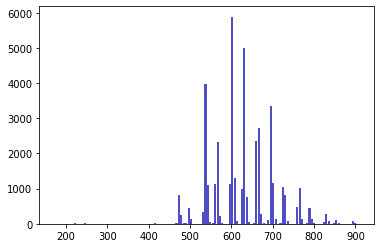

In [26]:
plt.hist(x = df["Rows"], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()

In [27]:
x=np.array(list(df["Columns"]))
print("Number of unique items: " + str(len(np.unique(x))))
print()
cols = (np.unique(x))
for item in cols:
    print(str(list(df["Columns"]).count(item)) + " image(s) have " + str(item) + " columns")
    print()

Number of unique items: 10

1 image(s) have 244 columns

4 image(s) have 268 columns

44 image(s) have 280 columns

4799 image(s) have 600 columns

7 image(s) have 640 columns

18226 image(s) have 680 columns

5 image(s) have 684 columns

18039 image(s) have 716 columns

1 image(s) have 760 columns

1 image(s) have 800 columns



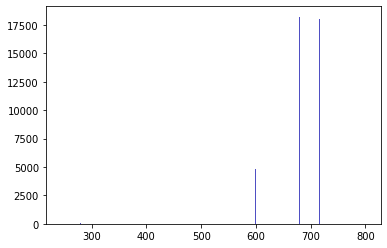

In [28]:
plt.hist(x = df["Columns"], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()

In [29]:
pd.set_option('display.max_rows', None)
df.groupby(['Rows','Columns']).size().reset_index().rename(columns={0:'count'})

,Rows,Columns,count
0,172,716,1
1,192,280,2
2,218,280,7
3,219,280,4
4,220,280,2
5,221,280,2
6,222,680,1
7,244,280,6
8,245,280,5
9,246,280,1
